# Explore low dimensional embeddings of drug and gene target word vectors

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import umap
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import json
from collections import defaultdict

### Load word vectors from TSV file

In [2]:
drug_tok_df = pd.read_csv('drug_token_word_vectors.tsv', sep='\t', index_col=0)
drug_tok_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2-mercaptoethane,-0.068437,0.296889,0.015993,-0.269163,0.494833,-0.027179,-0.177831,-0.015856,0.440450,-0.076302,...,-0.027472,0.119967,-0.074505,-0.325871,0.306147,0.088400,0.035131,0.033540,-0.123080,0.386364
5'-phosphate,0.236151,0.058919,-0.067057,-0.196729,0.464429,0.039194,-0.722116,-0.071847,0.252752,-0.232100,...,-0.106209,0.048964,-0.114308,-0.225470,0.151058,0.242736,-0.259116,-0.074161,0.072839,0.054318
90,-0.182816,-0.043654,0.260033,-0.046225,-0.142489,0.057018,0.207405,0.078859,0.010488,0.316938,...,-0.137218,0.079410,-0.160683,0.238722,-0.029722,-0.163321,-0.043282,0.124610,0.075238,0.156959
a,-0.119735,-0.117061,0.138365,0.031940,-0.001499,0.018906,-0.121371,-0.022017,-0.076790,-0.053176,...,-0.116073,-0.012562,-0.110594,0.130058,-0.037761,0.055270,0.093517,0.410534,-0.049416,0.171535
abarelix,-0.105164,0.351501,0.047296,0.265295,0.187151,-0.065108,0.395366,-0.358288,-0.042737,-0.030603,...,0.030087,-0.357897,-0.102014,0.033627,0.205016,0.028440,-0.115607,-0.076480,-0.475180,0.165892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zinc,0.319480,0.277130,0.232692,-0.219166,0.175772,0.018721,0.170566,-0.056085,-0.262663,-0.010557,...,0.274123,0.240839,-0.209718,0.109981,-0.240599,0.101571,0.486197,0.069373,-0.066688,0.312934
ziprasidone,-0.320497,0.208041,0.045522,0.216087,-0.112796,0.167128,0.098056,-0.145572,0.040750,0.361573,...,-0.173228,0.065505,-0.345666,0.000744,0.118559,-0.188318,0.193306,-0.138155,-0.322501,0.120989
zoledronic,0.081103,0.299580,0.438880,0.431495,0.207469,0.137813,0.336603,-0.212216,-0.093062,-0.494015,...,-0.731851,-0.604949,0.078898,-0.005194,0.084960,-0.082140,-0.273543,-0.065505,-0.323064,0.307865
zolmitriptan,-0.037484,0.203272,0.241822,0.201266,0.214729,0.029176,0.078638,-0.029533,-0.008630,0.061070,...,-0.091441,-0.124781,-0.494058,0.189647,0.163554,-0.066441,0.183977,-0.161055,-0.116000,0.286235


In [3]:
gene_df = pd.read_csv('drug_genes_word_vectors.tsv', sep='\t', index_col=0)
gene_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
ABAT,0.053164,0.064667,-0.215931,0.234970,0.077185,0.261936,-0.241471,-0.188410,0.093490,0.000453,...,0.009561,-0.128574,0.034887,0.026152,-0.280620,0.073333,0.139521,-0.033560,-0.176536,0.070914
ABCA1,-0.056907,0.133797,0.197420,0.001011,-0.061335,0.344699,-0.206254,0.025533,-0.096727,-0.056395,...,0.678372,0.131062,-0.000880,0.405810,0.058007,0.020745,0.136689,0.175625,-0.339394,0.255944
ABL1,0.077223,0.010567,0.491209,0.084531,0.135217,-0.366447,0.219640,-0.289077,0.361689,-0.027664,...,-0.007544,0.047329,0.120435,0.230166,-0.232085,-0.023402,0.047464,-0.066361,-0.356682,-0.165057
ACE,0.036385,0.173275,0.230366,0.079219,0.130337,0.331945,-0.193682,0.082520,-0.079293,0.310859,...,0.064495,-0.115309,0.174800,-0.156409,-0.080725,0.096573,0.118591,-0.065424,-0.180857,0.227972
ACHE,-0.026484,-0.249057,0.120465,0.158828,0.186795,-0.119519,-0.092770,-0.195088,-0.233866,0.128045,...,0.390196,0.023261,0.050666,0.190892,-0.272811,-0.068406,-0.007999,-0.321287,0.057363,0.184529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAMP2,0.265994,0.028096,0.288030,0.208038,0.283213,0.144011,0.168106,0.159388,0.273361,-0.076222,...,-0.070668,0.052661,-0.031801,0.288973,-0.014530,0.073681,-0.178310,0.266162,-0.299751,-0.000149
VDR,0.125544,-0.070393,0.170293,-0.166218,-0.059086,0.087363,-0.194521,-0.115519,-0.318750,-0.005565,...,0.125579,-0.034175,0.319851,0.218627,-0.059171,-0.082491,0.260596,-0.064489,-0.168708,0.073366
VEGFA,-0.104454,-0.021665,0.119863,0.095702,0.187247,0.266345,0.311800,0.052835,-0.033531,-0.122689,...,0.070472,-0.040973,0.091918,0.124344,-0.079926,0.025444,0.098278,-0.045100,0.129632,-0.207603
VKORC1,0.132210,-0.477732,0.371783,-0.323922,0.683666,0.568021,-0.164590,0.251878,-0.685355,-0.048349,...,0.270720,0.336365,0.054796,0.036936,0.233868,0.183128,-0.101859,0.191413,-0.337413,0.829387


In [4]:
with open('drug_to_gene_symbols.json', 'r') as f:
    drug_to_genes = json.load(f)
    
# Map each gene to its drugs
gene_to_drug = defaultdict(lambda: set())
for drug, genes in drug_to_genes.items():
    for gene in genes:
        gene_to_drug[gene].add(drug)
    
print('A few of the gene to drug mappings:')
print('----------------------------------')
print('\n'.join(['{}: {}'.format(k,v) for k,v in drug_to_genes.items()][:20]))

A few of the gene to drug mappings:
----------------------------------
2-mercaptoethane: ['GSDMC']
abarelix: ['GNRHR']
abatacept: ['CD86', 'CD80']
abciximab: ['ITGB3', 'ITGB3']
abiraterone acetate: ['CYP17A1']
abobotulinumtoxina: ['SNAP25']
acamprosate: ['GRIN3B', 'GABRE']
acarbose: ['AMY2A', 'MGAM']
acetaminophen: ['GSDMC', 'FAAH', 'TRPV1']
acetazolamide: ['CA1', 'CA12', 'CA4', 'CA2']
acetohydroxamic acid: ['GSDMC']
acetophenazine: ['DRD2']
acetylcholine: ['CHRM3']
acetyldigitoxin: ['ATP1B3']
aclidinium: ['CHRM3']
acrisorcin: ['GSDMC']
acrivastine: ['HRH1']
acyclovir: ['GSDMC']
adalimumab: ['TNF']
adapalene: ['GSDMC']


In [5]:
one_word_drugs = [drug for drug in drug_to_genes.keys() if len(drug.split()) == 1 and drug in drug_tok_df.index]
print('{}/{} of drugs are only one word'.format(len(one_word_drugs), len(drug_to_genes)))

837/1076 of drugs are only one word


In [6]:
one_word_drug_tok_df = drug_tok_df.loc[one_word_drugs]
one_word_drug_genes = set()
for drug in one_word_drugs:
    one_word_drug_genes.update(drug_to_genes[drug])
one_word_drug_genes = sorted(one_word_drug_genes)
one_word_drug_genes_df = gene_df.loc[one_word_drug_genes]
df_words_genes = pd.concat([one_word_drug_tok_df, one_word_drug_genes_df])
df_words_genes

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2-mercaptoethane,-0.068437,0.296889,0.015993,-0.269163,0.494833,-0.027179,-0.177831,-0.015856,0.440450,-0.076302,...,-0.027472,0.119967,-0.074505,-0.325871,0.306147,0.088400,0.035131,0.033540,-0.123080,0.386364
abarelix,-0.105164,0.351501,0.047296,0.265295,0.187151,-0.065108,0.395366,-0.358288,-0.042737,-0.030603,...,0.030087,-0.357897,-0.102014,0.033627,0.205016,0.028440,-0.115607,-0.076480,-0.475180,0.165892
abatacept,0.002331,0.323487,0.011535,0.213963,0.024010,0.451597,0.224253,-0.197744,0.239950,0.172598,...,-0.128854,-0.307012,-0.004504,-0.181347,0.199840,-0.489805,-0.082214,0.089753,-0.602369,0.191855
abciximab,0.087001,0.150570,0.105759,0.051662,-0.034809,0.029075,-0.304426,-0.199463,0.178420,0.249205,...,-0.141652,-0.225369,0.016156,-0.150602,0.237664,0.023798,0.029043,-0.233000,-0.215196,0.132939
abobotulinumtoxina,0.075118,0.028424,-0.092115,0.079525,-0.084855,-0.005338,0.061375,0.039924,0.004773,-0.023785,...,-0.037108,-0.037317,0.019555,0.075126,-0.066359,0.052172,-0.015333,-0.085393,-0.049002,0.100149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UGCG,0.085186,0.183407,0.020465,0.287011,-0.097174,0.107763,-0.067388,0.430618,0.067284,-0.157663,...,0.287740,-0.080521,0.159135,0.025478,0.094829,0.192596,0.081382,-0.107604,-0.267103,0.150153
VDR,0.125544,-0.070393,0.170293,-0.166218,-0.059086,0.087363,-0.194521,-0.115519,-0.318750,-0.005565,...,0.125579,-0.034175,0.319851,0.218627,-0.059171,-0.082491,0.260596,-0.064489,-0.168708,0.073366
VEGFA,-0.104454,-0.021665,0.119863,0.095702,0.187247,0.266345,0.311800,0.052835,-0.033531,-0.122689,...,0.070472,-0.040973,0.091918,0.124344,-0.079926,0.025444,0.098278,-0.045100,0.129632,-0.207603
VKORC1,0.132210,-0.477732,0.371783,-0.323922,0.683666,0.568021,-0.164590,0.251878,-0.685355,-0.048349,...,0.270720,0.336365,0.054796,0.036936,0.233868,0.183128,-0.101859,0.191413,-0.337413,0.829387


### Compute dimensionality reduction plots: blue = drugs, orange = genes

#### UMAP

<AxesSubplot:>

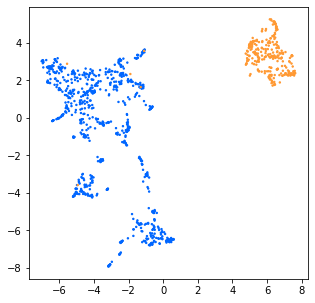

In [7]:
def color_by_gene_drug(plot_X):
    TWO_COLORS = ['#0066ff', '#ff9933']
    colors = []
    for word in df_words_genes.index:
        if word in drug_tok_df.index:
            colors.append(TWO_COLORS[0])
        elif word in gene_df.index:
            colors.append(TWO_COLORS[1])
            
    figure, ax = plt.subplots(
        1, 
        1,
        figsize = (5,5)
    ) 
    ax.scatter(plot_X[:,0], plot_X[:,1], s=2, c=colors)
    return ax
    
X = np.array(df_words_genes)
umap_model = umap.UMAP(metric='cosine')
X_umap = umap_model.fit_transform(X)
color_by_gene_drug(X_umap)

#### PCA 

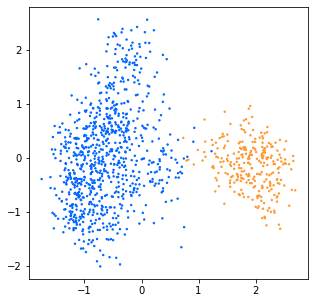

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)
ax_pca = color_by_gene_drug(X_pca)

#### Kernel PCA

<AxesSubplot:>

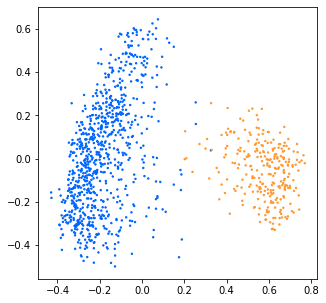

In [9]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='cosine')
X_kpca = kpca.fit_transform(X)
color_by_gene_drug(X_kpca)

### Now draw arrows between the drug and its drug target

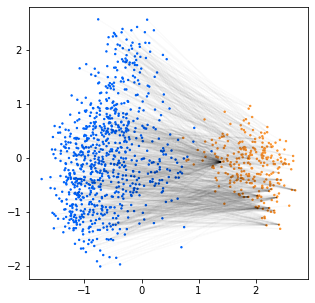

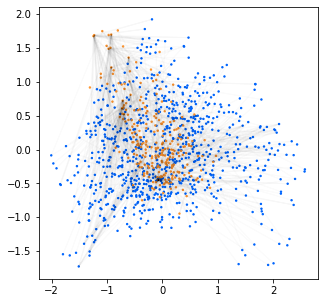

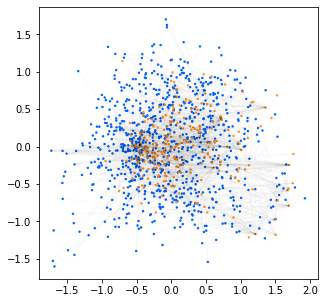

In [10]:
def draw_with_vectors(X_plot):
    drug_to_index = {}
    gene_to_index = {}
    for word_i, word in enumerate(df_words_genes.index):
        if word in drug_tok_df.index:
            drug_to_index[word] = word_i
        elif word in gene_df.index:
            gene_to_index[word] = word_i
    ax = color_by_gene_drug(X_plot)
    for word in df_words_genes.index:
        if word in drug_tok_df.index:
            x_drug = X_plot[drug_to_index[word]]
            genes = drug_to_genes[word]
            for gene in genes:
                if gene in df_words_genes.index:
                    x_gene = X_plot[gene_to_index[gene]]
                    plt.arrow(
                        x_drug[0], 
                        x_drug[1], 
                        x_gene[0]-x_drug[0], 
                        x_gene[1]-x_drug[1], 
                        alpha=0.015, 
                        width=0.000001
                    )
pca_all = PCA(n_components=4)
X_pca = pca_all.fit_transform(X)
draw_with_vectors(np.array([X_pca[:,0], X_pca[:,1]]).T)
draw_with_vectors(np.array([X_pca[:,1], X_pca[:,2]]).T)
draw_with_vectors(np.array([X_pca[:,2], X_pca[:,3]]).T)

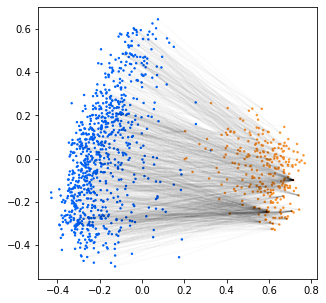

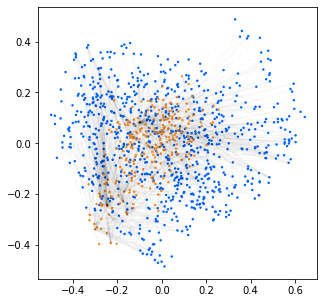

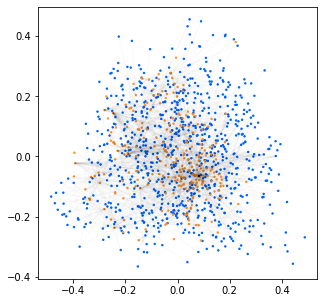

In [11]:
kpca = KernelPCA(n_components=4, kernel='cosine')
X_kpca = kpca.fit_transform(X)
draw_with_vectors(np.array([X_kpca[:,0], X_kpca[:,1]]).T)
draw_with_vectors(np.array([X_kpca[:,1], X_kpca[:,2]]).T)
draw_with_vectors(np.array([X_kpca[:,2], X_kpca[:,3]]).T)

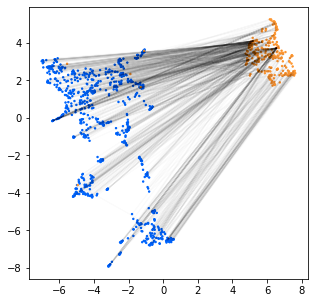

In [12]:
draw_with_vectors(X_umap)

### Now draw these plots with a bunch of other genes added to them

In [13]:
df_hallmark_genes = pd.read_csv('hallmark_genes_word_vectors.tsv', sep='\t', index_col=0)
df_genes_wout_drug = df_hallmark_genes.loc[sorted(set(df_hallmark_genes.index) - set(df_words_genes.index))]
df_all_genes = pd.concat([
    df_hallmark_genes,
    gene_df
])

df_drug_genes_all = pd.concat([
    one_word_drug_tok_df, 
    one_word_drug_genes_df, 
    df_genes_wout_drug
])
df_drug_genes_all

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2-mercaptoethane,-0.068437,0.296889,0.015993,-0.269163,0.494833,-0.027179,-0.177831,-0.015856,0.440450,-0.076302,...,-0.027472,0.119967,-0.074505,-0.325871,0.306147,0.088400,0.035131,0.033540,-0.123080,0.386364
abarelix,-0.105164,0.351501,0.047296,0.265295,0.187151,-0.065108,0.395366,-0.358288,-0.042737,-0.030603,...,0.030087,-0.357897,-0.102014,0.033627,0.205016,0.028440,-0.115607,-0.076480,-0.475180,0.165892
abatacept,0.002331,0.323487,0.011535,0.213963,0.024010,0.451597,0.224253,-0.197744,0.239950,0.172598,...,-0.128854,-0.307012,-0.004504,-0.181347,0.199840,-0.489805,-0.082214,0.089753,-0.602369,0.191855
abciximab,0.087001,0.150570,0.105759,0.051662,-0.034809,0.029075,-0.304426,-0.199463,0.178420,0.249205,...,-0.141652,-0.225369,0.016156,-0.150602,0.237664,0.023798,0.029043,-0.233000,-0.215196,0.132939
abobotulinumtoxina,0.075118,0.028424,-0.092115,0.079525,-0.084855,-0.005338,0.061375,0.039924,0.004773,-0.023785,...,-0.037108,-0.037317,0.019555,0.075126,-0.066359,0.052172,-0.015333,-0.085393,-0.049002,0.100149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRF4,0.060313,0.083094,0.010364,-0.017720,0.078028,0.019639,-0.115816,-0.012722,0.012876,-0.064588,...,-0.158529,-0.040321,-0.020093,0.087633,-0.097730,0.192649,0.013842,-0.101916,-0.081613,0.030380
ZPBP,0.107813,0.018171,-0.006919,-0.016838,-0.065301,-0.004930,-0.024649,0.018833,0.016110,-0.075768,...,-0.019812,-0.008118,-0.005785,0.014018,-0.080635,0.069611,0.025183,-0.047769,-0.004354,-0.048950
ZW10,-0.021063,-0.201356,0.428133,0.094347,0.211951,-0.252446,0.055773,0.021310,-0.040150,-0.164490,...,-0.015010,-0.131370,0.180089,-0.013603,-0.064131,0.417639,0.092930,0.328875,-0.265221,0.154613
ZWINT,0.121313,-0.050566,0.238834,-0.253078,0.062291,-0.003148,-0.096750,-0.121336,-0.087330,-0.168139,...,-0.110669,-0.123235,0.064041,0.040250,-0.029503,0.337646,0.017051,-0.041837,-0.161952,-0.191491


In [96]:
def color_by_gene_drug_gene_no_drug(plot_X):
    THREE_COLORS = ['#0066ff', '#ff9933', '#009900']
    colors = []
    for word in df_drug_genes_all.index:
        if word in drug_tok_df.index:
            colors.append(THREE_COLORS[0])
        elif word in gene_df.index:
            colors.append(THREE_COLORS[1])
        else:
            colors.append(THREE_COLORS[2])
            
    figure, ax = plt.subplots(
        1, 
        1,
        figsize = (5,5)
    ) 
    ax.scatter(plot_X[:,0], plot_X[:,1], s=3, lw=0, alpha=0.2, c=colors)
    return ax, figure

def draw_with_vectors_all(X_plot):
    drug_to_index = {}
    gene_to_index = {}
    for word_i, word in enumerate(df_drug_genes_all.index):
        if word in drug_tok_df.index:
            drug_to_index[word] = word_i
        elif word in gene_df.index:
            gene_to_index[word] = word_i

    ax, figure = color_by_gene_drug_gene_no_drug(X_plot)
    for word in df_drug_genes_all.index:
        if word in drug_tok_df.index:
            x_drug = X_plot[drug_to_index[word]]
            genes = drug_to_genes[word]
            for gene in genes:
                if gene in df_words_genes.index:
                    x_gene = X_plot[gene_to_index[gene]]
                    plt.arrow(
                        x_drug[0], 
                        x_drug[1], 
                        x_gene[0]-x_drug[0], 
                        x_gene[1]-x_drug[1], 
                        alpha=0.015, 
                        width=0.000001
                    )
    return ax, figure

/Users/matthewbernstein/Development/python3_dev/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../python3_dev/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/Users/matthewbernstein/Development/python3_dev/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diag

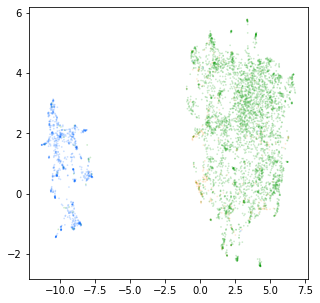

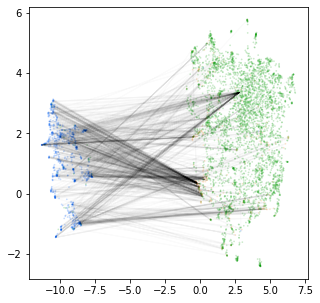

In [15]:
X_all = np.array(df_drug_genes_all)
umap_model = umap.UMAP(metric='cosine')
X_umap_all = umap_model.fit_transform(X_all)
color_by_gene_drug_gene_no_drug(X_umap_all)

draw_with_vectors_all(X_umap_all)                    

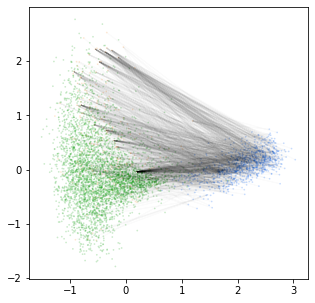

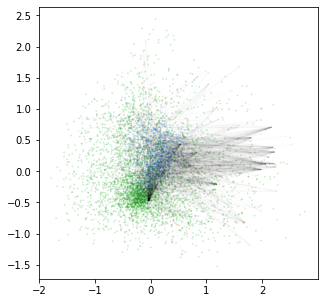

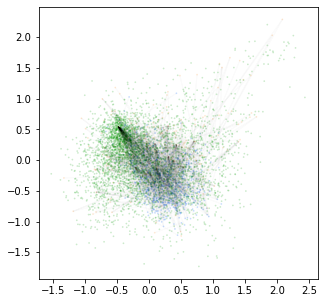

In [16]:
pca_all = PCA(n_components=4)
X_pca_all = pca_all.fit_transform(X_all)
draw_with_vectors_all(np.array([X_pca_all[:,0], X_pca_all[:,1]]).T)
plt.savefig('PCA_drug_target_direction.png', format='png', dpi=500)
draw_with_vectors_all(np.array([X_pca_all[:,1], X_pca_all[:,2]]).T)
draw_with_vectors_all(np.array([X_pca_all[:,2], X_pca_all[:,3]]).T)

### Is there a difference in the direction going from drugs to targets than from just drugs to genes in general?

In [17]:
def draw_mean_drug_target_vec(X_plot):
    drug_to_index = {}
    gene_to_index = {}
    for word_i, word in enumerate(df_drug_genes_all.index):
        if word in drug_tok_df.index:
            drug_to_index[word] = word_i
        elif word in gene_df.index:
            gene_to_index[word] = word_i
            
    normalized_vecs = []
    drug_vecs = []
    for word in df_drug_genes_all.index:
        if word in drug_tok_df.index:
            x_drug = X_plot[drug_to_index[word]]
            drug_vecs.append(x_drug)
            genes = drug_to_genes[word]
            for gene in genes:
                if gene in df_words_genes.index:
                    x_gene = X_plot[gene_to_index[gene]]
                    x_source = x_drug[0]
                    y_source = x_drug[1]
                    x_targ = x_gene[0]-x_drug[0] 
                    y_targ = x_gene[1]-x_drug[1]
                    mag = np.sqrt((x_targ - x_source)**2 + (y_targ - y_source)**2)
                    normalized_vecs.append([
                       (x_targ - x_source) / mag,
                       (y_targ - y_source) / mag 
                    ])
    normalized_vecs = np.array(normalized_vecs)
    mean_vec = np.array([
        np.mean(normalized_vecs.T[0]),
        np.mean(normalized_vecs.T[1])
    ])
    drug_centroid = [
        np.mean(np.array(drug_vecs).T[0]),
        np.mean(np.array(drug_vecs).T[1])
    ]  
    plt.arrow(
        drug_centroid[0], 
        drug_centroid[1], 
        mean_vec[0], 
        mean_vec[1], 
        alpha=1.0, 
        width=0.1,
        color='blue',
        length_includes_head=True
    )

def draw_drug_centroid_to_gene_centroid_vec(X_plot):
    drug_to_index = {}
    gene_to_index = {}
    for word_i, word in enumerate(df_drug_genes_all.index):
        if word in drug_tok_df.index:
            drug_to_index[word] = word_i
        elif word in df_all_genes.index:
            gene_to_index[word] = word_i
            
    drug_vecs = []
    gene_vecs = []
    for word in df_drug_genes_all.index:
        if word in drug_tok_df.index:
            x_drug = X_plot[drug_to_index[word]]
            drug_vecs.append(x_drug)
        elif word in df_all_genes.index:
            x_gene = X_plot[gene_to_index[word]]
            gene_vecs.append(x_gene)
            
    drug_centroid = [
        np.mean(np.array(drug_vecs).T[0]),
        np.mean(np.array(drug_vecs).T[1])
    ] 
    gene_centroid = [
        np.mean(np.array(gene_vecs).T[0]),
        np.mean(np.array(gene_vecs).T[1])
    ]
    
    plt.arrow(
        drug_centroid[0], 
        drug_centroid[1], 
        gene_centroid[0] - drug_centroid[0], 
        gene_centroid[1] - drug_centroid[1],
        alpha=1.0, 
        width=0.1,
        color='red',
        length_includes_head=True
    )
    

#### In the plot below, we draw the mean vector going from drugs to targets (blue) as well as the mean vector between all pairs of drugs and genes (red)

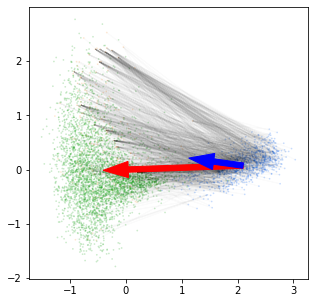

In [18]:
draw_with_vectors_all(np.array([X_pca_all[:,0], X_pca_all[:,1]]).T)
draw_drug_centroid_to_gene_centroid_vec(np.array([X_pca_all[:,0], X_pca_all[:,1]]).T)
#draw_drug_to_gene_all_pairs_vec(np.array([X_pca_all[:,0], X_pca_all[:,1]]).T)
draw_mean_drug_target_vec(np.array([X_pca_all[:,0], X_pca_all[:,1]]).T)
plt.savefig('PCA_drug_target_direction_vs_all_drug_gene_direction.png', format='png', dpi=500)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

def plot_distribution_of_distances(X_plot):
    drug_to_index = {}
    gene_to_index = {}
    for word_i, word in enumerate(df_drug_genes_all.index):
        if word in drug_tok_df.index:
            drug_to_index[word] = word_i
        elif word in df_all_genes.index:
            gene_to_index[word] = word_i
            
            
    
    print("Separating drug and gene word vectors...")
    drug_vecs = []
    gene_vecs = []
    for word in df_drug_genes_all.index:
        if word in drug_tok_df.index:
            x_drug = X_plot[drug_to_index[word]]
            drug_vecs.append((word, x_drug))
        elif word in df_all_genes.index:
            x_gene = X_plot[gene_to_index[word]]
            gene_vecs.append((word, x_gene))
    print("done.")
    
    
    print("Computing pairwise similarities...")
    target_sims = []
    non_target_sims = []
    for drug, drug_vec in drug_vecs:
        for gene, gene_vec in gene_vecs:
            sim = cosine_similarity([drug_vec, gene_vec])[0][1]
            if gene in gene_to_drug and drug in gene_to_drug[gene]:
                target_sims.append(sim)
            else:
                non_target_sims.append(sim)
    print("done.")
    
    return target_sims, non_target_sims


#target_sims, non_target_sims = plot_distribution_of_distances(X_all)

In [20]:
#figure, ax = plt.subplots(
#    1, 
#    1,
#    figsize = (5,5)
#)
#sns.distplot(target_sims, ax=ax, label='Drug to Target')
#sns.distplot(non_target_sims, ax=ax, label='Drug to Non-target')
#ax.legend()
#plt.show()

In [71]:
# Semantic components analysis

import semantic_components_analysis
import importlib
importlib.reload(semantic_components_analysis)

def compute_sca(X):
    drug_to_index = {}
    gene_to_index = {}
    for word_i, word in enumerate(df_drug_genes_all.index):
        if word in drug_tok_df.index:
            drug_to_index[word] = word_i
        elif word in gene_df.index:
            gene_to_index[word] = word_i

    dir_vecs = []
    for word in df_drug_genes_all.index:
        if word in drug_tok_df.index:
            x_drug = X[drug_to_index[word]]
            genes = drug_to_genes[word]
            for gene in genes:
                if gene in df_words_genes.index:
                    x_gene = X[gene_to_index[gene]]
                    dir_vecs.append(x_gene - x_drug)
    
    dir_vecs = np.array(dir_vecs)
    print('computing SCA...')
    sca, solver_statuses =  semantic_components_analysis.SCA(dir_vecs, method='root_solver')
    print(solver_statuses)
    return sca
    
sca = compute_sca(X)
print(sca)


computing SCA...
Normalizing input vectors...
done.
Solving dimension 1...
Solving dimension 2...
Solving dimension 3...
Solving dimension 4...
Solving dimension 5...
Solving dimension 6...
Solving dimension 7...
Solving dimension 8...
Solving dimension 9...
Solving dimension 10...
Solving dimension 11...
Solving dimension 12...
Solving dimension 13...
Solving dimension 14...
Solving dimension 15...
Solving dimension 16...
Solving dimension 17...
Solving dimension 18...
Solving dimension 19...
Solving dimension 20...
Solving dimension 21...
Solving dimension 22...
Solving dimension 23...
Solving dimension 24...
Solving dimension 25...
Solving dimension 26...
Solving dimension 27...
Solving dimension 28...
Solving dimension 29...
Solving dimension 30...
Solving dimension 31...
Solving dimension 32...
Solving dimension 33...
Solving dimension 34...
Solving dimension 35...
Solving dimension 36...
Solving dimension 37...
Solving dimension 38...
Solving dimension 39...
Solving dimension 40.

In [63]:
print(X_sca.shape)
print([np.linalg.norm(x) for x in X_sca])

(200, 200)
[0.9999999999999998, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0000000000000004, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0000000000000004, 1.0, 1.0, 1.0, 0.9999999999999987, 0.9999999999999997, 1.0, 1.0000000000049614, 1.0, 1.0000000000000338, 1.0000000000000038, 0.9999999999999998, 0.9999999999996253, 1.0, 1.000000000000004, 0.9999999999999867, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0000000000000033, 0.9999999999999488, 1.0000000000000002, 1.0000000000005025, 1.0000000000000002, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999972, 0.9999999999954706, 1.0000000000000002, 1.0000000000021498, 0.9999999999999966, 1.0, 0.9999999999999999, 0.9999999999999984, 1.0, 1.0000000000000016, 1.0, 1.0, 1.0000000000000524, 1.0, 1.0000000000000002, 0.9999999999999999, 1.0000000000001557, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0000000000004905, 1.0000000000010194, 0.9999999999999991, 1.0, 0.9999999999999973, 0.9999999999999996, 1.000000000000

In [66]:
np.dot(X_sca[100], X_sca[10])

1.6263032587282567e-19

In [103]:
X_sca = np.dot(sca[[30,60]], X_all.T).T
X_sca

array([[ 0.27532946,  0.22912986],
       [-0.03404911, -0.08510563],
       [ 0.08322395,  0.31654218],
       ...,
       [ 0.28282832, -0.12839161],
       [-0.13514343,  0.12770405],
       [-0.17511583,  0.06856325]])

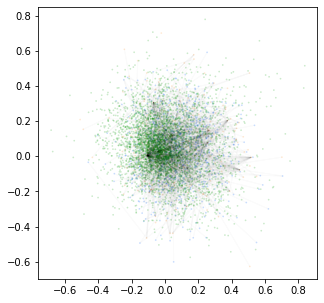

In [104]:
ax, figure = draw_with_vectors_all(np.array([X_sca[:,0], X_sca[:,1]]).T)
figure.savefig('PCA_drug_target_direction_vs_all_drug_gene_SCA.png', format='png', dpi=500)


